In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Step 1:  Load data into a dataframe
addr1 = "/Users/Veronica/Documents/DSC550/Week 6/week-6/cardiodata.csv"
df = pd.read_csv(addr1)



In [3]:
#Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)


NameError: name 'data' is not defined

In [ ]:
df.head()

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [5]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
#Data contains ages between 29 and 65.
print(df.age.min())
df.age.max()

10798


23713

In [7]:
df = df[df['height'] >= 125]

In [8]:
df[df['height'] > 200]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6486,9223,21220,1,250,86.0,140,100,3,1,0,0,1,1
21628,30894,19054,2,207,78.0,100,70,1,1,0,1,1,0


In [9]:
df.drop(index=6486, inplace= True)

In [10]:
# find where ap_lo is higher than ap_hi
df = df[df['ap_hi'] > df['ap_lo']]

In [11]:
# remove ap_hi and ap_lo with negative and extremely low numbers
# anything with systolic < 80 and diastolic < 50 is considered abnormally low
df = df[df['ap_hi'] > 80]
df = df[df['ap_lo'] > 50]

In [12]:
# remove any ap_hi an ap_lo readings that are abnormally high
df = df[df['ap_hi'] < 250]

In [13]:
# while these diastolic readings are very high, 
# they are still lower than the systolic and match other features
df[df['ap_lo'] > 150]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4781,6769,18961,1,158,74.0,200,170,1,1,0,0,1,1
4981,7054,22722,2,173,74.0,220,160,2,2,0,0,1,1
38022,54282,21770,1,161,84.0,196,182,2,2,0,0,1,1
43998,62861,22652,2,163,70.0,200,180,1,1,0,0,0,1
54987,78442,19491,1,169,80.0,200,160,3,3,0,0,1,0


In [14]:
#remove any low values of weight
#40kg = 88lbs, this would indicate a underweight person, or a typo in the data
df = df[df['weight'] >= 40]

In [15]:
# reset index
df.reset_index(inplace= True, drop= True)

In [16]:
# change feature names
new_names = {'ap_hi' : 'systolic', 
             'ap_lo' : 'diastolic', 
             'gluc' : 'glucose', 
             'alco': 'alcohol', 
             'cardio': 'disease'
            }

In [17]:
df = df.rename(columns= new_names)

In [18]:
df.shape

(68413, 13)

In [19]:
df_eda = df.copy()

In [20]:
#data with new names
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
id,68413.0,49971.318258,28848.329006,0.0,25000.0,50007.0,74867.0,99999.0
age,68413.0,19466.545905,2467.326653,10798.0,17662.0,19702.0,21326.0,23713.0
gender,68413.0,1.349027,0.476666,1.0,1.0,1.0,2.0,2.0
height,68413.0,164.450835,7.842102,125.0,159.0,165.0,170.0,207.0
weight,68413.0,74.153387,14.259347,40.0,65.0,72.0,82.0,200.0
systolic,68413.0,126.744961,16.620734,85.0,120.0,120.0,140.0,240.0
diastolic,68413.0,81.366188,9.376343,52.0,80.0,80.0,90.0,182.0
cholesterol,68413.0,1.364931,0.679155,1.0,1.0,1.0,2.0,3.0
glucose,68413.0,1.225864,0.571804,1.0,1.0,1.0,1.0,3.0
smoke,68413.0,0.087966,0.283247,0.0,0.0,0.0,0.0,1.0


In [21]:
#function to categorize blood pressure
def bp_categories(systolic, diastolic):
    if systolic > 180 or diastolic > 120:
        return 'Crisis'
    elif (140 <= systolic < 180) or (90 <= diastolic < 120):
        return 'HBP_stage2'
    elif (130 <= systolic < 140) or (80 <= diastolic < 90) :
        return 'HBP_stage1'
    elif (120 <= systolic < 130) and diastolic < 80:
        return 'Elevated'
    else:
        return 'Normal'

In [22]:
# HTN is abbreviation for hypertension
df_eda['HTN_stage'] = df_eda[['systolic', 'diastolic']].apply\
(lambda x: bp_categories(*x), axis= 1)

In [23]:
df_eda.HTN_stage.value_counts()

HBP_stage1    32429
HBP_stage2    23120
Normal         9471
Elevated       3097
Crisis          296
Name: HTN_stage, dtype: int64

Text(0, 0.5, '# of Patients')

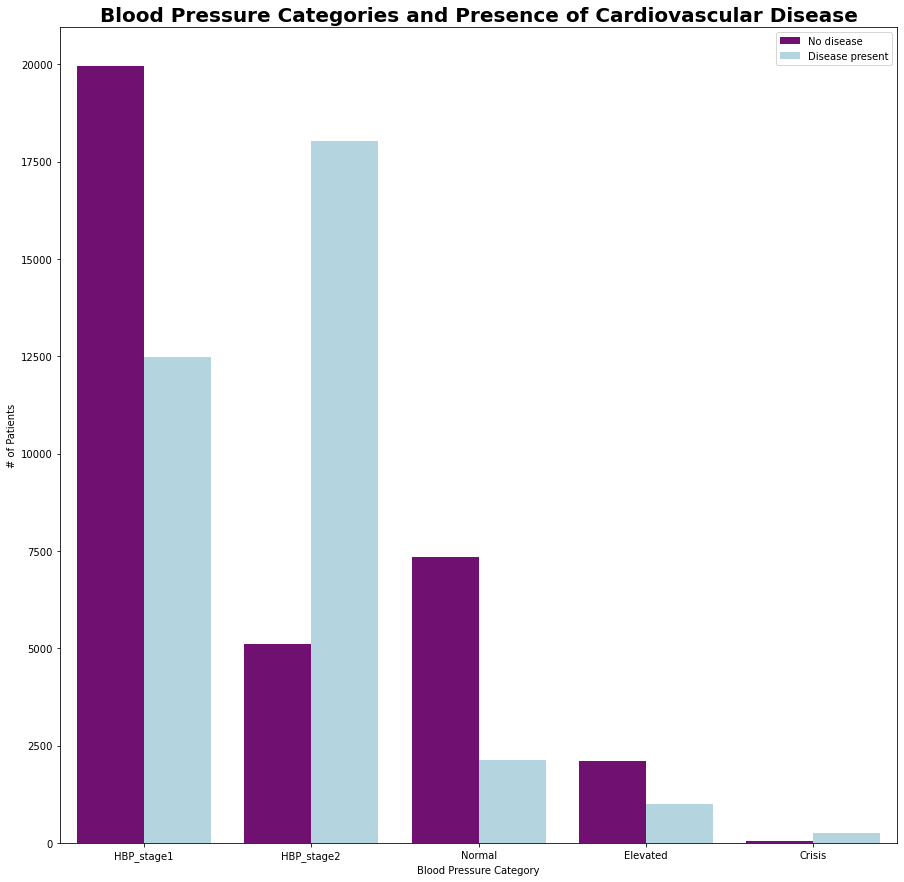

In [26]:
pal = ['purple' , 'lightblue']

plt.figure(figsize= (15,15))
sns.countplot(x= 'HTN_stage', hue= 'disease', data= df_eda, palette= pal)
plt.title('Blood Pressure Categories and Presence of Cardiovascular Disease', 
          fontweight= 'bold', fontsize= 20)
plt.xlabel('Blood Pressure Category')
plt.legend( ['No disease', 'Disease present'])
plt.ylabel('# of Patients')


In [27]:
print(df_eda.age.min())
print(df_eda.age.max())
df_eda[df_eda['age'] < 30]

10798
23713


,id,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,disease,HTN_stage


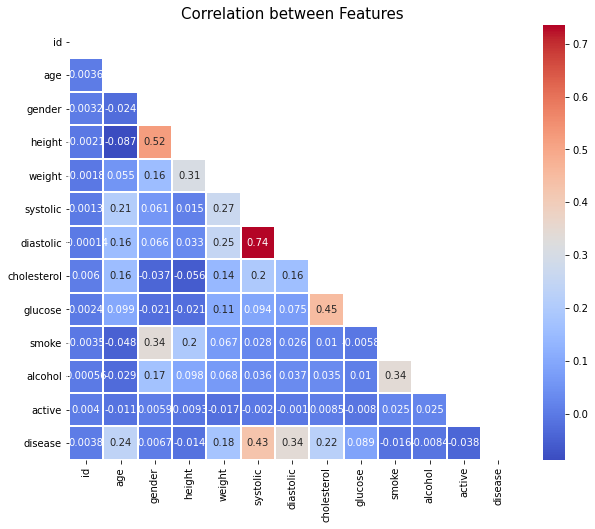

In [28]:
corr = df.corr()

plt.figure(figsize= (10,8))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(df.corr(), cmap= 'coolwarm', mask= mask, linewidths= 1, annot= True)
plt.title('Correlation between Features', fontsize= 15)
plt.show()

In [29]:
df_eda.groupby(['alcohol', 'smoke'])['disease'].mean()

alcohol  smoke
0        0        0.497266
         1        0.481851
1        0        0.514054
         1        0.440377
Name: disease, dtype: float64

In [30]:
df_eda.groupby(['alcohol', 'smoke'])['disease'].count()

alcohol  smoke
0        0        60545
         1         4215
1        0         1850
         1         1803
Name: disease, dtype: int64

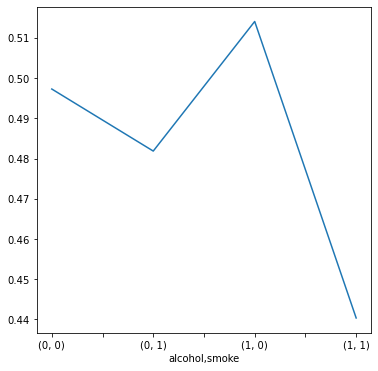

In [31]:
fig= plt.figure(figsize= (6,6))
al_smo = df_eda.groupby(['alcohol', 'smoke'])['disease'].mean().plot()

In [32]:
# bin ages into categories
df_eda.loc[(df_eda['age'] < 40), 'age_range'] = 30
df_eda.loc[(df_eda['age'] >= 40) & (df_eda['age'] < 50), 'age_range'] = 40
df_eda.loc[(df_eda['age'] >= 50) & (df_eda['age'] < 60), 'age_range'] = 50
df_eda.loc[(df_eda['age'] >= 60) & (df_eda['age'] < 70), 'age_range'] = 60

In [33]:
df_eda.age_range.value_counts(normalize= True)

Series([], Name: age_range, dtype: float64)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

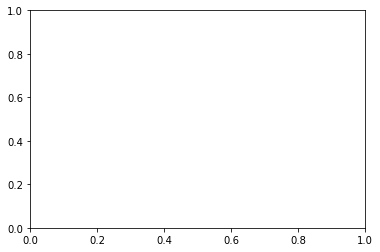

In [34]:


sns.countplot(x= 'age_range', hue= 'disease', data= df_eda)
plt.title('Age Ranges and Cardiovascular Disease')
plt.xlabel('Age Range')
plt.legend( ['No disease', 'Disease present'])
plt.ylabel('Patients')


Text(0, 0.5, 'Patients')

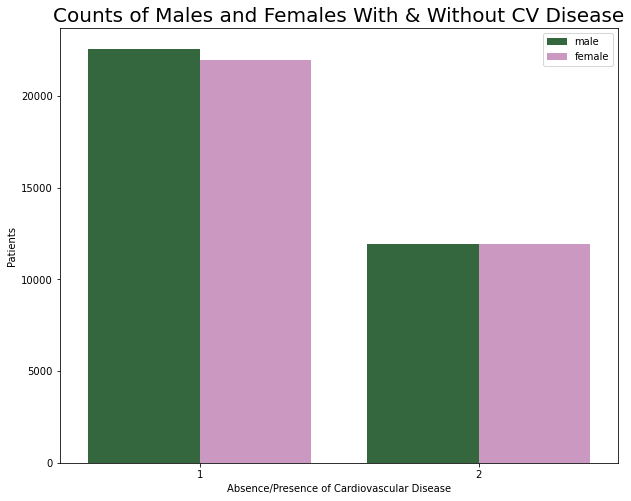

In [35]:
legend_labels = ['male', 'female']

plt.figure(figsize= (10, 8))
plt.title('Counts of Males and Females With & Without CV Disease', fontsize= 20)
sns.countplot(x= 'gender', hue= 'disease', data= df_eda, palette= 'cubehelix')
plt.xlabel('Absence/Presence of Cardiovascular Disease')
plt.legend(legend_labels)
plt.ylabel('Patients')

In [36]:
import seaborn as sns

In [82]:
pip install -U scikit-learn

     |████████████████████████████████| 7.2 MB 4.3 MB/s eta 0:00:01
ERROR: yellowbrick 1.2.1 has requirement scikit-learn<0.24,>=0.20, but you'll have scikit-learn 0.24.1 which is incompatible.
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1
Note: you may need to restart the kernel to use updated packages.


In [87]:
#Part 3

from sklearn.model_selection import train_test_split, GridSearchCV, \
RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score, accuracy_score, classification_report,\
confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_roc_curve

In [124]:
classifiers = {
    'Random Forest' : RandomForestClassifier(), 
    'Support Vector Machine' : SVC(),  
}

In [125]:
def get_results(model, model_name):
    train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    # get classification report
    print('{} Classification Report'.format(model_name))
    print(classification_report(y_test, y_pred))
    
    # get confusion matrix
    plot_confusion_matrix(model, X_test, y_test, cmap= "Blues", values_format= '.5g')
    plt.grid(False)
    plt.show()
    
    # get accuracy and F1 scores
    train_acc = accuracy_score(y_train, train_pred) * 100
    test_acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred)
    
    #get false neg and true positive
    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1][0]
    TP = cm[1][1]
    
    # save measurements into results df
    results.loc[model_name] = [round(train_acc, 2), round(test_acc, 2), 
                               round(f1, 2), round(FN, 0), round(TP, 0)]

In [126]:
#Random Forest
RF = RandomForestClassifier()

In [127]:
    param_grid_RF = {
    'n_estimators' : [200],
    'max_depth' : [100], 
    'min_samples_split' : [5, 8], 
    'min_samples_leaf' : [3],
    'class_weight' : [{1 : 1.5}, {1 : 1.7}]
}

# Instantiate Randomized Search
RS_RF = RandomizedSearchCV(RF, param_grid_RF, n_iter= 20, scoring= 'recall', 
                           random_state= 42)

In [120]:
RS_RF.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  if self._is_all_lists():


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'class_weight': [{1: 1.5}, {1: 1.7}],
                                        'max_depth': [100],
                                        'min_samples_leaf': [3],
                                        'min_samples_split': [5, 8],
                                        'n_estimators': [200]},
                   random_state=42, scoring='recall')

In [ ]:
RS_RF.best_params_

RS Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.75      0.66      0.70      8642
           1       0.69      0.78      0.73      8462

    accuracy                           0.72     17104
   macro avg       0.72      0.72      0.72     17104
weighted avg       0.72      0.72      0.72     17104



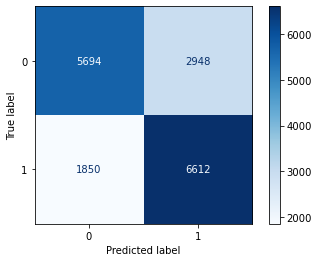

In [121]:
# see model results and add to results df
get_results(RS_RF, 'RS Random Forest')

In [143]:
#Support Vector
svc = SVC(class_weight = {1: 1.5}, random_state= 42)

In [144]:
# fit model
# approx 2 mins to run
svc.fit(X_train, y_train)

SVC(class_weight={1: 1.5}, random_state=42)

Tuned SVM Classification Report
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      8642
           1       0.70      0.78      0.73      8462

    accuracy                           0.72     17104
   macro avg       0.73      0.72      0.72     17104
weighted avg       0.73      0.72      0.72     17104



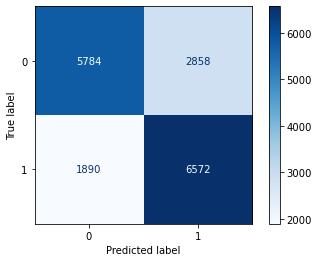

In [145]:
# see model results and add to results df
get_results(svc, 'Tuned SVM')


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [151]:
y_test.shape

(17104,)

In [152]:
scaler = StandardScaler()

In [153]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [157]:
classifiers = {
    'Random Forest' : RandomForestClassifier(), 
    'Support Vector Machine' : SVC(), 
}

In [158]:
# takes approx 2 mins to run
results = pd.DataFrame(columns= ['Train_accuracy', 'Test_accuracy', 'F1_score', 
                                'False_Negative', 'True_Positive'])

for key, value in classifiers.items():
    #fit models
    value.fit(X_train, y_train)
    train_pred = value.predict(X_train)
    y_pred = value.predict(X_test)
    
    # get accuracy, f1 score
    train_acc = accuracy_score(y_train, train_pred) * 100
    test_acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred)
    
    #get false neg and true positive
    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1][0]
    TP = cm[1][1]
    
    # add measurements to datafram
    results.loc[key] = [round(train_acc, 2), round(test_acc, 2), 
                        round(f1, 2), round(FN, 0), round(TP, 0)]

In [159]:
results.sort_values(by= ['F1_score', 'False_Negative'], ascending= False)

,Train_accuracy,Test_accuracy,F1_score,False_Negative,True_Positive
Support Vector Machine,73.78,73.22,0.71,2790.0,5672.0
Random Forest,99.55,71.43,0.71,2577.0,5885.0


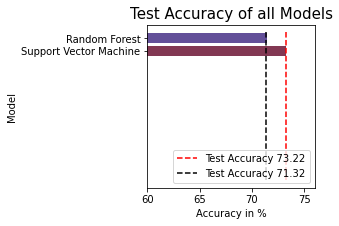

In [163]:
fig, ax = plt.subplots(figsize=(3,3))
sns.barplot(x= results['Test_accuracy'], y= results.index, palette = 'twilight')
plt.vlines(x = 73.22, ymin = -.5, ymax = 11.5, linestyle= 'dashed', 
           color = 'r', label= 'Test Accuracy 73.22')
plt.vlines(x = 71.32, ymin = -.5, ymax = 11.5, linestyle= 'dashed', 
           color = 'black', label= 'Test Accuracy 71.32')
plt.title('Test Accuracy of all Models', fontsize= 15)
plt.ylabel('Model')
plt.xlabel('Accuracy in %')
plt.xlim(60, 76)
ax.legend(loc = 'lower right')
